# Pip install 

In [1]:
pip install tensorflow==2.9.1 tensorflow-gpu==2.9.1 opencv-python mediapipe

Note: you may need to restart the kernel to use updated packages.


# Importing libraries

In [2]:
import cv2
import time
import os
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np

# Defining functions

In [3]:
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils

# Detection model function

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

# Drawing landmark to the model

In [78]:
#Giving design to landmarks
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(250,110,50), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(60,75,241), thickness=2, circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,200,80), thickness=2, circle_radius=2),
                             mp_drawing.DrawingSpec(color=(43,37,239), thickness=2, circle_radius=2))
                             
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,200,80), thickness=2, circle_radius=2),
                              mp_drawing.DrawingSpec(color=(43,37,239), thickness=2, circle_radius=2))

# Capturing the sample photo

In [79]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #read feed
        
        ret, frame = cap.read()

                #make detection
        image, results = mediapipe_detection(frame,holistic)
        print(results)
        
    
        #draw landmarks
        draw_landmarks(image, results)

        #show to screen
        cv2.imshow('OpenCv feed', image)

        #break gracefully
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
#frames 
frame

array([[[159, 139, 125],
        [157, 137, 123],
        [159, 139, 125],
        ...,
        [255, 253, 255],
        [255, 252, 255],
        [255, 252, 255]],

       [[161, 140, 126],
        [160, 140, 126],
        [162, 142, 128],
        ...,
        [255, 253, 255],
        [255, 252, 255],
        [255, 252, 255]],

       [[164, 143, 128],
        [167, 146, 131],
        [165, 145, 130],
        ...,
        [255, 253, 255],
        [255, 252, 255],
        [255, 252, 255]],

       ...,

       [[ 20,  20,  44],
        [ 21,  21,  45],
        [ 21,  21,  44],
        ...,
        [ 33,  24,  38],
        [ 33,  24,  38],
        [ 33,  24,  38]],

       [[ 19,  20,  43],
        [ 19,  20,  43],
        [ 19,  21,  42],
        ...,
        [ 35,  26,  39],
        [ 35,  26,  39],
        [ 35,  26,  39]],

       [[ 20,  21,  44],
        [ 19,  21,  43],
        [ 18,  20,  41],
        ...,
        [ 35,  26,  39],
        [ 36,  27,  40],
        [ 35,  26,  39]]

In [8]:
#length of the landmark results
len(results.left_hand_landmarks.landmark)

21

In [80]:
#define the landmarks
draw_landmarks(frame, results)

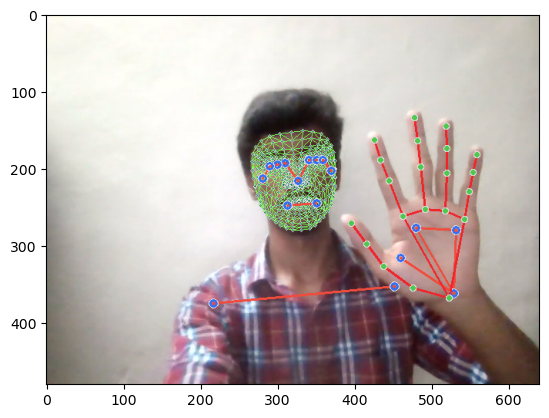

In [81]:
#image from the sample photo
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [11]:
#pose landmark function
pose = []
for res in results.left_hand_landmarks.landmark:
    test = np.array([res.x, res.y, res.z])
    test_1 = np.array([res.x, res.y, res.z])
    pose.append([test, test_1])

In [12]:
#calling pose
pose

[[array([8.00936520e-01, 6.78753853e-01, 3.73600955e-07]),
  array([8.00936520e-01, 6.78753853e-01, 3.73600955e-07])],
 [array([ 0.7490859 ,  0.65651047, -0.02209806]),
  array([ 0.7490859 ,  0.65651047, -0.02209806])],
 [array([ 0.70236194,  0.61333871, -0.03433378]),
  array([ 0.70236194,  0.61333871, -0.03433378])],
 [array([ 0.67431843,  0.5698179 , -0.04452379]),
  array([ 0.67431843,  0.5698179 , -0.04452379])],
 [array([ 0.64956242,  0.53446305, -0.0543863 ]),
  array([ 0.64956242,  0.53446305, -0.0543863 ])],
 [array([ 0.73306453,  0.51027822, -0.02229322]),
  array([ 0.73306453,  0.51027822, -0.02229322])],
 [array([ 0.71082431,  0.43681628, -0.03915317]),
  array([ 0.71082431,  0.43681628, -0.03915317])],
 [array([ 0.69923401,  0.39196008, -0.05274475]),
  array([ 0.69923401,  0.39196008, -0.05274475])],
 [array([ 0.69107914,  0.35250366, -0.06241815]),
  array([ 0.69107914,  0.35250366, -0.06241815])],
 [array([ 0.76628125,  0.49529517, -0.02478905]),
  array([ 0.76628125,  

In [13]:
#Extract keypoints of lefthand and right hand
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [14]:
#key points were set into the arry
results_text = extract_keypoints(results)

In [15]:
#calling the array
results_text[:10]

array([ 8.00936520e-01,  6.78753853e-01,  3.73600955e-07,  7.49085903e-01,
        6.56510472e-01, -2.20980607e-02,  7.02361941e-01,  6.13338709e-01,
       -3.43337841e-02,  6.74318433e-01])

# Defining the data path

In [16]:
#definig the data path for the folder
DATA_PATH = os.path.join('Sigma_sri')

#set of actions 
actions = np.array(['Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday','Sunday'])

#set number of sequence to 30
no_sequences = 30

#sequence length of the video is 30sec
sequence_length = 30

In [17]:
#Using the action and sequence creating the directory path
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass


# Training phase of the model

In [23]:
#Training phase of the model

'''cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                
                ret, frame = cap.read()
                
                image, results = mediapipe_detection(frame, holistic)
                
                draw_landmarks(image, results)
                
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                               cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0),4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} video number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_COMPLEX, 0.5,(0,0,255),1,cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000)
                    
                else:
                    cv2.putText(image, 'Collecting frames for {} video Number {}'.format(action,sequence), (15,12),
                               cv2.FONT_HERSHEY_COMPLEX, 0.5,(0,0,255),1, cv2.LINE_AA)
                    
                    cv2.imshow('OpenCv Feed', image)
                    
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence),str(frame_num))
                np.save(npy_path, keypoints)
                
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()'''

# Train test spliting 

In [18]:
#sklearn to import the necessary packages
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [19]:
#Creating the label map for training image
label_map = {label:num for num, label in enumerate(actions)}

In [20]:
label_map

{'Monday': 0,
 'Tuesday': 1,
 'Wednesday': 2,
 'Thursday': 3,
 'Friday': 4,
 'Saturday': 5,
 'Sunday': 6}

In [21]:
sequences, labels = [],[]
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res =  np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [22]:
np.array(sequences).shape

(210, 30, 126)

In [23]:
np.array(labels).shape

(210,)

In [24]:
x = np.array(sequences)

In [25]:
x.shape

(210, 30, 126)

In [26]:
y = to_categorical(labels).astype(int)

In [27]:
y.shape

(210, 7)

In [28]:
#train test spliting
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3)

In [29]:
Y_test.shape

(63, 7)

# Importing Tensorflow models

In [30]:
#Importing the tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU

# LSTM model

In [49]:
#LSTM
model =Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [50]:
#LSTM model compile
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [51]:
#LSTM model
model.fit(X_train, Y_train, epochs=2000)

Epoch 1/2000
5/5 [==============================] - 3s 35ms/step - loss: 1.9577 - categorical_accuracy: 0.1429
Epoch 2/2000
5/5 [==============================] - 0s 31ms/step - loss: 1.9424 - categorical_accuracy: 0.1633
Epoch 3/2000
5/5 [==============================] - 0s 32ms/step - loss: 1.9366 - categorical_accuracy: 0.1633
Epoch 4/2000
5/5 [==============================] - 0s 31ms/step - loss: 1.9036 - categorical_accuracy: 0.2517
Epoch 5/2000
5/5 [==============================] - 0s 31ms/step - loss: 1.7889 - categorical_accuracy: 0.2857
Epoch 6/2000
5/5 [==============================] - 0s 32ms/step - loss: 1.8013 - categorical_accuracy: 0.2721
Epoch 7/2000
5/5 [==============================] - 0s 32ms/step - loss: 1.8264 - categorical_accuracy: 0.2993
Epoch 8/2000
5/5 [==============================] - 0s 32ms/step - loss: 1.6438 - categorical_accuracy: 0.2381
Epoch 9/2000
5/5 [==============================] - 0s 31ms/step - loss: 1.5578 - categorical_accuracy: 0.3129
E

In [52]:
#LSTM summary 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            48896     
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 7)                 231       
                                                                 
Total params: 203,591
Trainable params: 203,591
Non-tr

In [53]:
#LSTM predict
yhat = model.predict(X_test)

2/2 [==============================] - 0s 12ms/step


In [54]:
#LSTM
ytrue = np.argmax(Y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [55]:
#LSTM accuracy
accuracy_score(ytrue,yhat)

0.8888888888888888

In [60]:
#LSTM RESULTS

sequence = []
sentence = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(5) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# GRU model

In [39]:
#GRU
model_1 = Sequential()
model_1.add(GRU(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model_1.add(GRU(128, return_sequences=True, activation='relu'))
model_1.add(GRU(64, return_sequences=False, activation='relu'))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(actions.shape[0], activation='softmax'))

In [40]:
#GRU model compile
model_1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [41]:
#GRU model

model_1.fit(X_train, Y_train, epochs=1000)

Epoch 1/1000
5/5 [==============================] - 5s 46ms/step - loss: 1.9504 - categorical_accuracy: 0.1429
Epoch 2/1000
5/5 [==============================] - 0s 43ms/step - loss: 1.9424 - categorical_accuracy: 0.2313
Epoch 3/1000
5/5 [==============================] - 0s 45ms/step - loss: 1.9334 - categorical_accuracy: 0.3401
Epoch 4/1000
5/5 [==============================] - 0s 44ms/step - loss: 1.9198 - categorical_accuracy: 0.4150
Epoch 5/1000
5/5 [==============================] - 0s 42ms/step - loss: 1.8971 - categorical_accuracy: 0.4898
Epoch 6/1000
5/5 [==============================] - 0s 46ms/step - loss: 1.8647 - categorical_accuracy: 0.3810
Epoch 7/1000
5/5 [==============================] - 0s 44ms/step - loss: 1.8096 - categorical_accuracy: 0.3469
Epoch 8/1000
5/5 [==============================] - 0s 45ms/step - loss: 1.7316 - categorical_accuracy: 0.4082
Epoch 9/1000
5/5 [==============================] - 0s 45ms/step - loss: 1.7192 - categorical_accuracy: 0.2721
E

In [43]:
#GRU summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 64)            36864     
                                                                 
 gru_1 (GRU)                 (None, 30, 128)           74496     
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 7)                 231       
                                                                 
Total params: 155,079
Trainable params: 155,079
Non-tr

In [44]:
#GRU predict
yhat_1 = model_1.predict(X_test)

2/2 [==============================] - 1s 16ms/step


In [45]:
#GRU
ytrue_1 = np.argmax(Y_test, axis=1).tolist()
yhat_1 = np.argmax(yhat_1, axis=1).tolist()

In [46]:
#GRU accuracy
accuracy_score(ytrue_1,yhat_1)

0.9682539682539683

In [74]:
#GRU RESULTS

sequence = []
sentence = []
threshold = 0.5

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        ret, frame = cap.read()
        
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_landmarks(image, results)
        
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model_1.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            
            
        cv2.imshow('OpenCv Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
                                    
    cap.release()
    cv2.destroyAllWindows()
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

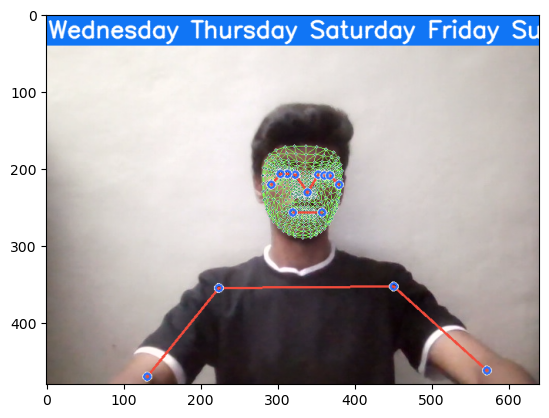

In [75]:
#Output of the function
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [85]:
cap.release()
cv2.destroyAllWindows()